In [1]:
#File:Main_Berkeley_Data.csv
#Link: https://sda.berkeley.edu/sdaweb/analysis/?dataset=scfcomb

#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib
from matplotlib import font_manager

In [2]:
#Set style for rest of notebook
matplotlib.style.use("fivethirtyeight") #for bar charts
#matplotlib.style.use("classic") #for line graphs
matplotlib.rcParams["font.size"] = 10

In [3]:
#Importing file and reading it
file = "Main_Berkeley_Data.csv"
df = pd.read_csv(file)
print(df.head())

   YEAR  INDCAT   INCOME  WAGEINC  DEBT2INC     DEBT  NETWORTH  EDCL EDUC
0  1989       4  9737.17  1947.43  0.157130  1530.01   2201.71     2    8
1  1989       4  9737.17  1947.43  0.136052  1324.76   2406.96     2    8
2  1989       4  9737.17  1947.43  0.174376  1697.93   2033.79     2    8
3  1989       4  9737.17  1947.43  0.172460  1679.27   2052.45     2    8
4  1989       4  9737.17  1947.43  0.151382  1474.03   2257.69     2    8


C:\Users\Administrador2\AppData\Local\Temp\ipykernel_1660\3866751949.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [4]:
#Cleaning EDUC and turning its string inputs into integer outputs to use for the statistical analysis
df["EDUC"].replace("  ", np.nan, inplace = True)
df['EDUC'] = pd.to_numeric(df['EDUC'])

In [5]:
#Creating mulyiple groupbys using different variables all compared to educational level and a mean average
type_mean = df.groupby("EDUC")["NETWORTH"].mean()
type1_mean = df.groupby("EDUC")["INCOME"].mean()
type2_mean = df.groupby("EDUC")["DEBT"].mean()
type4_mean = df.groupby("INDCAT")["EDUC"].mean()

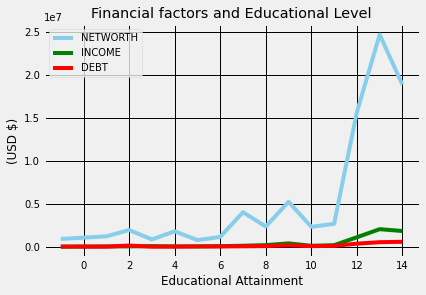

In [6]:
#Using previously calculated variables to create multiple line graphs
type_mean.plot(kind = "line", title = "Networth by Educational Level", ylabel = "Networth", xlabel = "Educational Attainment", color = "Skyblue")
type1_mean.plot(kind = "line", title = "Income by Educational Level", ylabel = "Income", xlabel = "Educational Attainment", color = "Green")
type2_mean.plot(kind = "line", title = "Financial factors and Educational Level", ylabel = "(USD $)", xlabel = "Educational Attainment", color = "Red")

plt.grid(True, color = "Black", linewidth = "1", linestyle = "-")
plt.legend() 
#plt.savefig("NID&EDUC", dpi = 300)

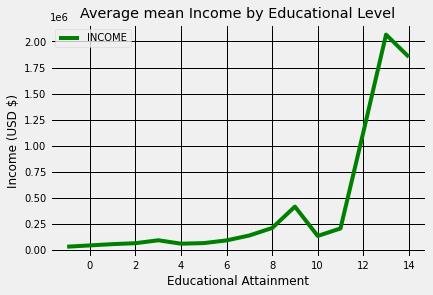

In [7]:
#Line graph just for Mean Income
type1_mean.plot(kind = "line", title = "Average mean Income by Educational Level", ylabel = "Income (USD $)", xlabel = "Educational Attainment", color = "Green")

plt.grid(True, color = "Black", linewidth = "1", linestyle = "-")
plt.legend()
#plt.savefig("Income&EDUC.png", dpi = 300)

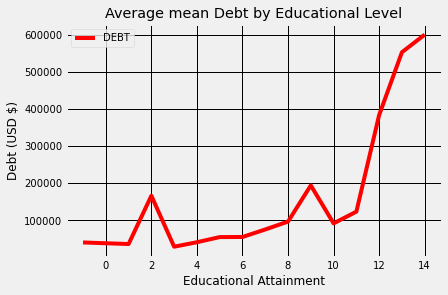

In [8]:
#Line graph just for Mean debt
type2_mean.plot(kind = "line", title = "Average mean Debt by Educational Level", ylabel = "Debt (USD $)", xlabel = "Educational Attainment", color = "Red")

plt.grid(True, color = "Black", linewidth = "1", linestyle = "-")
plt.legend()
#plt.savefig("Debt&EDUC.png", dpi = 300)

In [9]:
#Grouping variables by industry sector INDCAT
INDCAT_mean = df.groupby("INDCAT")["NETWORTH"].mean()
INDCAT1_mean = df.groupby("INDCAT")["INCOME"].mean()
INDCAT2_mean = df.groupby("INDCAT")["DEBT"].mean()

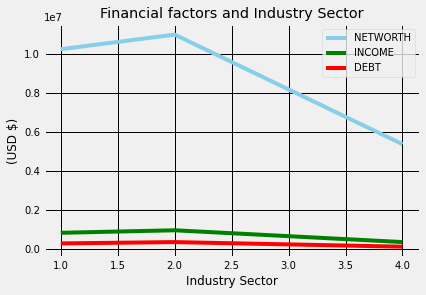

In [10]:
#Creatign multiple line graphs bby industry sector and other variables
INDCAT_mean.plot(kind = "line", title = "Networth by Educational Level", ylabel = "Networth", xlabel = "Educational Attainment", color = "SkyBlue")
INDCAT1_mean.plot(kind = "line", title = "Income by Educational Level", ylabel = "Income", xlabel = "Educational Attainment", color = "Green")
INDCAT2_mean.plot(kind = "line", title = "Financial factors and Industry Sector", ylabel = "(USD $)", xlabel = "Industry Sector", color = "Red")

plt.grid(True, color = "Black", linewidth = "1", linestyle = "-")
plt.legend() 
#plt.savefig("FinancialFactors&INDCAT(NID).png", dpi = 300)

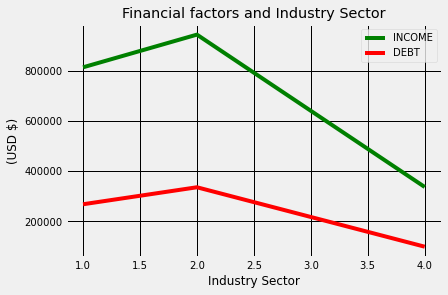

In [11]:
#Line graphs for debt and income by industry sector

INDCAT1_mean.plot(kind = "line", title = "Income by Educational Level", ylabel = "Income", xlabel = "Educational Attainment", color = "Green")
INDCAT2_mean.plot(kind = "line", title = "Financial factors and Industry Sector", ylabel = "(USD $)", xlabel = "Industry Sector", color = "Red")

plt.grid(True, color = "Black", linewidth = "1", linestyle = "-")
plt.legend()
#plt.savefig("FinancialFactor&INDCAT(I&D).png", dpi = 300)

<AxesSubplot:title={'center':'Educational Level by Industry'}, xlabel='Industry', ylabel='Educational Attainment'>

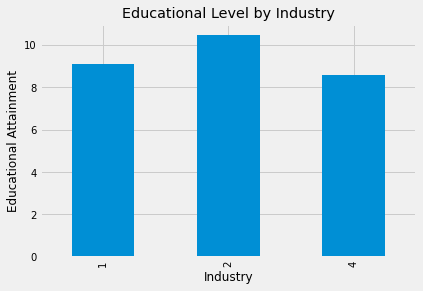

In [12]:
#bar chart of educational attainment and Industry sector
type4_mean.plot(kind = "bar", title = "Educational Level by Industry", ylabel = "Educational Attainment", xlabel = "Industry")

#plt.savefig("EDUCbyINDCAT.png", dpi = 300)

<AxesSubplot:title={'center':'Income by Industry'}, xlabel='Industry', ylabel='Income (USD $)'>

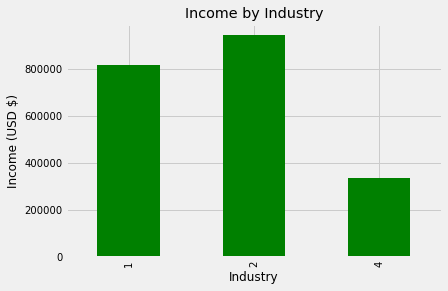

In [13]:
type9_mean = df.groupby("INDCAT")["INCOME"].mean()
type9_mean.plot(kind = "bar", title = "Income by Industry", ylabel = "Income (USD $)", xlabel = "Industry", color = "Green")

#plt.savefig("IncomeByINDCAT.png", dpi = 300)

In [14]:
#Regression graph (Probably wont use it)
x_ary = df["NETWORTH"]
x_with_cnst = sm.add_constant(x_ary)
model = sm.OLS(df["INCOME"], x_with_cnst)
results = model.fit()
b, m = results.params
print(m)
print(b)

0.05886383079644685
207596.33220008892


In [15]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 INCOME   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                 1.074e+05
Date:                Thu, 14 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:54:01   Log-Likelihood:            -3.9949e+06
No. Observations:              238880   AIC:                         7.990e+06
Df Residuals:                  238878   BIC:                         7.990e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.076e+05   9225.343     22.503      0.0

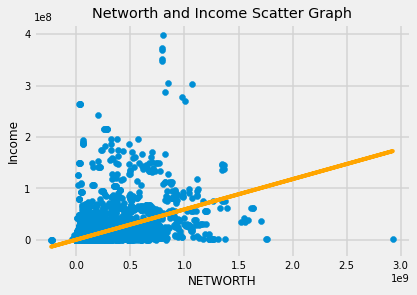

In [16]:
#Actually Plotting the graph
plt.scatter(df["NETWORTH"], df["INCOME"])
plt.plot(x_ary, m*x_ary+b, color = "orange")
plt.title("Networth and Income Scatter Graph")
plt.xlabel("NETWORTH")
plt.ylabel("Income")
plt.grid(True, color = "LightGrey", linewidth = "1.5", linestyle = "-")